# Baseline Model

## Importamos el csv de "Data Cleaning"

In [1]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
data = pd.read_csv('../../cyberbullying/data/data.csv')

In [3]:
data.head()

,text,target
0,this is not creative those are the dictionar...,0.0
1,the term standard model is itself less npov...,0.0
2,true or false the situation as of march was...,0.0
3,next maybe you could work on being less conde...,0.0
4,this page will need disambiguation,0.0


## Armamos el train set

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)

## Baseline model (Desbalanceado)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data.text)

y = data.target

nb_model = MultinomialNB()

nb_model.fit(X,y)

nb_model.score(X,y)

0.8995763724446568

El accuracy 0.89 se debe al desbalanceo del dataset.

## Baseline model (Balanceado 50/50)

### Balanceo 50/50

In [7]:
len_1 = train_data[train_data['target']==1].shape[0]

In [8]:
train_data_0 = train_data[train_data['target']==0].sample(len_1)

In [9]:
train_data_1 = train_data[train_data['target']==1]

In [10]:
train_data_01 = pd.concat([train_data_0,train_data_1])

### Baseline model

In [30]:
X_train_vec = vectorizer.fit_transform(train_data_01.text)
y_train = train_data_01.target
nb_model = MultinomialNB()

#nb_model.fit(X_train,y_train)

cv_results = cross_validate(nb_model,X_train_vec,train_data_01.target,cv=10,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

recall = np.round_(cv_results['test_recall'].mean(),3)
precision = np.round_(cv_results['test_precision'].mean(),3)
accuracy = np.round_(cv_results['test_accuracy'].mean(),3)
f1 = np.round_(cv_results['test_f1'].mean(),3)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Recall: 0.829
Precision: 0.836
Accuracy: 0.833
F1 Score: 0.832


## Matriz de Confusion (Train Balanceado 70/30)

In [12]:
X_test_vec = vectorizer.transform(test_data.text)
y_test = test_data.target

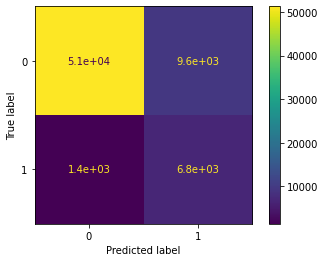

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train_vec,y_train)
y_pred = nb_model.predict(X_test_vec)
cm5050 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5050,display_labels=[0,1])
disp.plot();


In [33]:
def conf_mx_metrics(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")

In [34]:
conf_mx_metrics(cm5050)

Recall: 0.824
Precision: 0.414
Accuracy: 0.84


In [14]:
y_pred.sum()

16338.0

In [15]:
y_test.sum()

8214.0